# Minimal_Monthly_Temperatures_Time_Series_Forecasting

### Shanmukha Rajasekhar Somireddi

In [17]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series

#### The dataset contains the minimum temperatures over 10 years (1981-1990) in the city Melbourne, Australia

In [18]:
train=pd.read_csv("Dataset/train_temperature_time_series.csv")
test=pd.read_csv("Dataset/test_temperature_time_series.csv")

In [19]:
train.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [20]:
test.head()

,Date,Temp
0,1990-01-01,14.8
1,1990-01-02,13.3
2,1990-01-03,15.6
3,1990-01-04,14.5
4,1990-01-05,14.3


In [21]:
train.dtypes, test.dtypes

(Date     object
 Temp    float64
 dtype: object,
 Date     object
 Temp    float64
 dtype: object)

In [22]:
train.shape, test.shape

((3285, 2), (365, 2))

In [23]:
train['Date']=pd.to_datetime(train.Date,format= '%Y-%m-%d')
test['Date']=pd.to_datetime(test.Date,format= '%Y-%m-%d')

In [24]:
for i in (train,test):
  i['year']=i.Date.dt.year
  i['month']=i.Date.dt.month
  i['day']=i.Date.dt.day

### Exploratory Data Analysis and Visualization

In [25]:
train.set_index('Date',inplace=True)

#### Plotting the data of minimal temperature over time

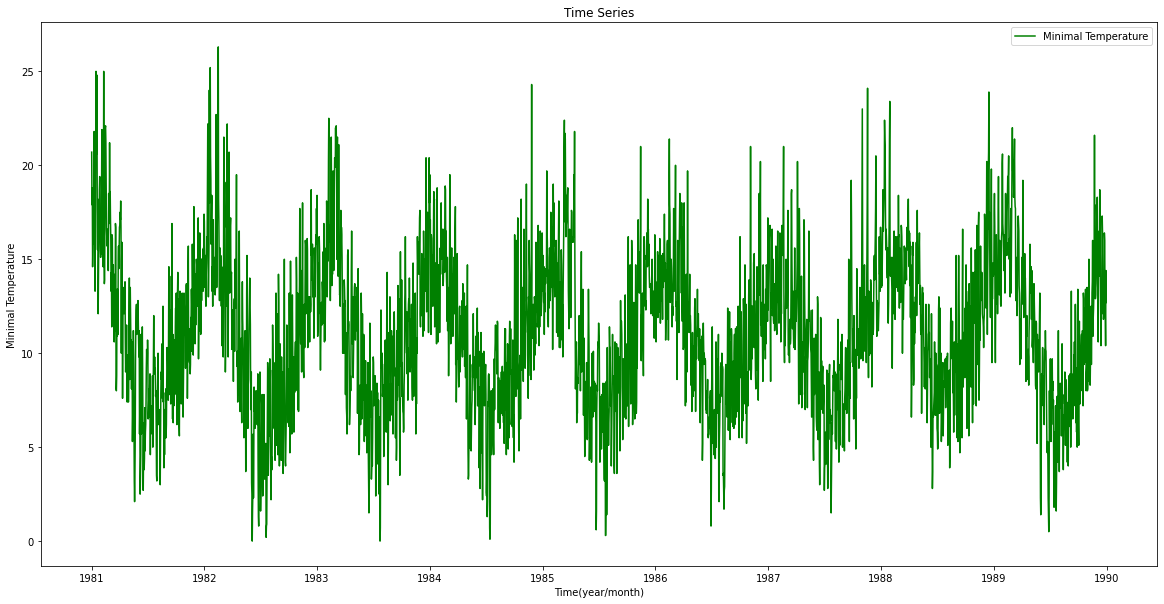

In [26]:

df=train
ts=df['Temp']
plt.figure(figsize=(20,10))
plt.plot(ts,color = 'g', label='Minimal Temperature')
plt.title('Time Series')
plt.xlabel('Time(year/month)')
plt.ylabel('Minimal Temperature')
plt.legend(loc='best')

#### Mean of minimal temperatures yearwise

<AxesSubplot:xlabel='year'>

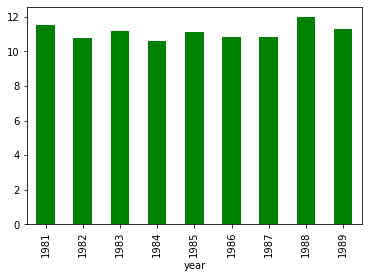

In [27]:
train.groupby('year')['Temp'].mean().plot.bar(color = 'g')

#### Mean of minimal temperatures monthwise

<AxesSubplot:xlabel='month'>

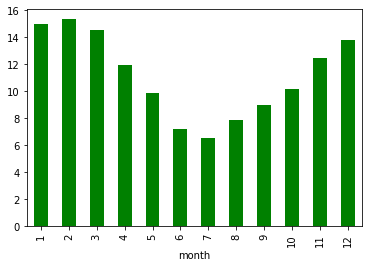

In [28]:
train.groupby('month')['Temp'].mean().plot.bar(color = 'g')

<AxesSubplot:title={'center':'Minimal Temperature (Year, Month)'}, xlabel='year,month'>

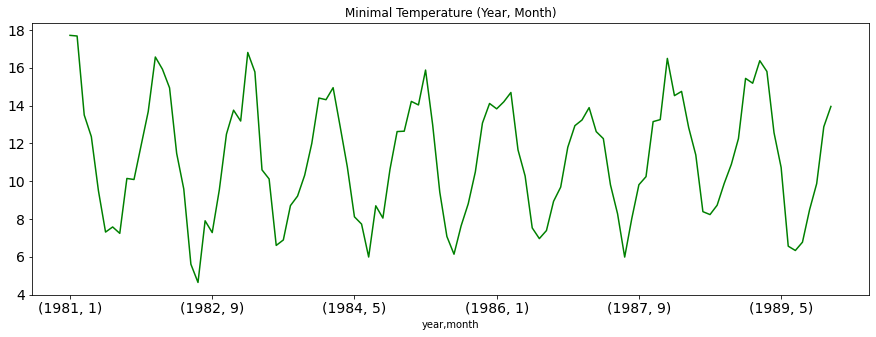

In [29]:
# Trend including month and year data
tem=train.groupby(['year', 'month'])['Temp'].mean()
tem.plot(figsize=(15,5),color = 'g', title='Minimal Temperature (Year, Month)',fontsize=14)
#Thus we understand that it is seasonal trend

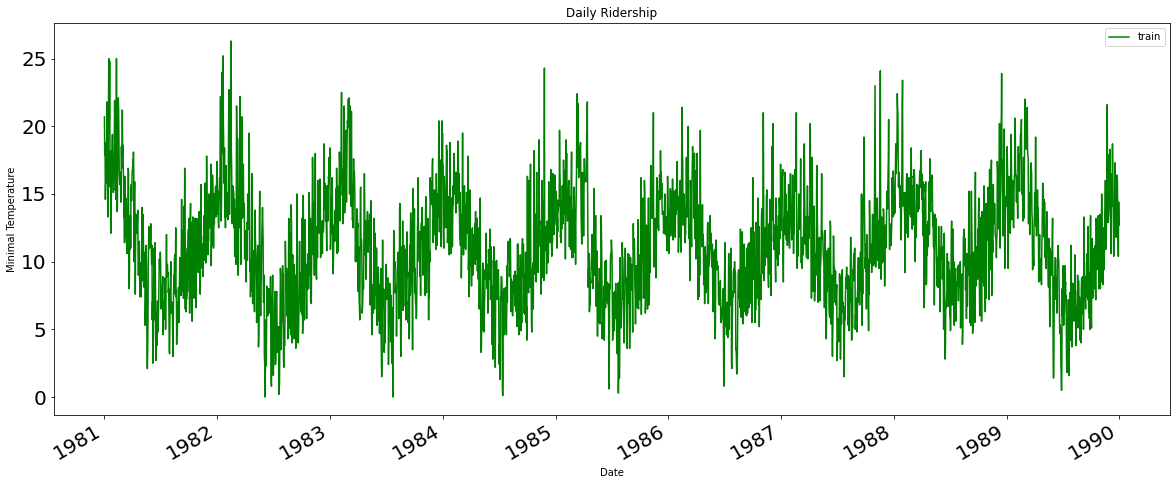

In [30]:
train.Temp.plot(figsize=(20,8),color = 'g', title='Daily Ridership',fontsize=20,label='train')
plt.xlabel('Date')
plt.ylabel('Minimal Temperature')
plt.legend(loc='best')
plt.show()

In [31]:
#To make graph smooth we will use monthly predictions
monthly_train=train.resample('M').mean()

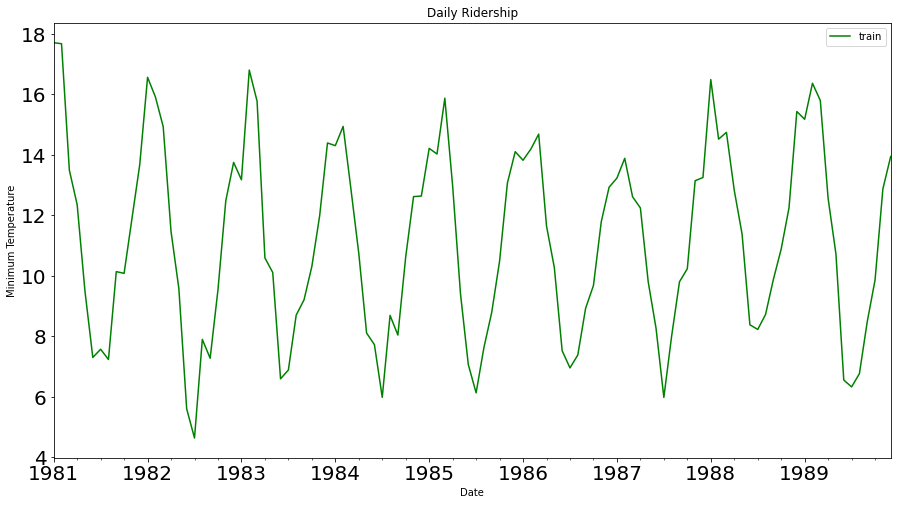

In [32]:
monthly_train.Temp.plot(figsize=(15,8),color = 'g', title='Daily Ridership',fontsize=20,label='train')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.legend(loc='best')
plt.show()